In [1]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=2000) # 가장 많이 쓰여진 단어 2000개

In [3]:
len(x_train) # 영화 리뷰 갯수

25000

In [4]:
len(x_train[0]) # 첫번째 리뷰문서의 길이(구의 개수)

218

In [5]:
len(x_train[1]) 

189

In [6]:
x_train  # texts_to_sequences 데이터로 구성되어 있음 -> 각자 길이는 다르니까 패딩작업은 필요함

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118, 1634

In [7]:
category = max(y_train) + 1 
category  # 2개..?

2

In [8]:
y_train # 0, 1로 보아 원핫인코딩 신경쓰지 말라는 배려 같음

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [9]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd[0].value_counts()

1    12500
0    12500
Name: 0, dtype: int64

In [10]:
x_train_pd = pd.DataFrame(x_train)
x_train_pd

,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2..."
3,"[1, 4, 2, 2, 33, 2, 4, 2, 432, 111, 153, 103, ..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."
...,...
24995,"[1, 14, 9, 6, 2, 20, 21, 1517, 7, 2, 5, 2, 86,..."
24996,"[1, 2, 2, 299, 6, 1042, 37, 80, 81, 233, 8, 40..."
24997,"[1, 11, 6, 230, 245, 2, 9, 6, 1225, 446, 2, 45..."
24998,"[1, 1446, 2, 69, 72, 2, 13, 610, 930, 8, 12, 5..."


# 2500개의 리뷰를 긍정/부정 카테고리로 매칭하는 모델
### 범주화 2000개, 띄어쓰기 갯수는 100개까지 끊음, y는 0/1로 원핫인코딩 미시행

In [11]:
# 패딩시키기
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [12]:
x_train = pad_sequences(x_train, maxlen=100, padding='pre') # 너무 긴게 있을수도 있으니 maxlen 사용
x_test = pad_sequences(x_test, maxlen=100, padding='pre')

In [13]:
print(x_train.shape)
print(x_test.shape)

(25000, 100)
(25000, 100)


In [14]:
y_train.shape

(25000,)

# 질문) 
1) lstm,시계열 이런 키워드가 나왔는데 자연어처리랑 무슨 관련이 있는지? 막연히 최신 댓글이 더 영향력이 커서 그렇게 설명하신건가?
아니면 input shape 필요없는거때문에 편리해서 쓰는건가?
2) 종속변수도 임베딩으로 벡터화 시키면 안되나요..?!
3) 로이터에서 pad_sequences 길이대로 임배딩 시키는게 제일 적합하다고 생각했는데 100이 아닌 1000으로 지정한 이유?

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten, Conv1D, MaxPooling1D

# 학습

In [16]:
model = Sequential()
# model.add(Embedding(2000, 100, input_length=100)) # 종류는 2000개고 구의 길이는 100개로 끊어줌
model.add(Embedding(2000, 100))
model.add(Conv1D(128,5,padding='same'))
model.add(MaxPooling1D(4))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# 여기서 strach out 됨....ㅠ 붙여서 써야겠네

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, batch_size=200, validation_split=0.2)
acc = model.evaluate(x_test,y_test)[1]
print('acc :',acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         200000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 317,761
Trainable params: 317,761
Non-trainable params: 0
________________________________________________

C:\Users\bitcamp\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 4s 179us/step - loss: 0.4802 - acc: 0.7500 - val_loss: 0.3740 - val_acc: 0.8348
Epoch 2/100
20000/20000 [==============================] - 2s 92us/step - loss: 0.3215 - acc: 0.8622 - val_loss: 0.3677 - val_acc: 0.8362
Epoch 3/100
20000/20000 [==============================] - 2s 93us/step - loss: 0.2782 - acc: 0.8827 - val_loss: 0.3810 - val_acc: 0.8364
Epoch 4/100
20000/20000 [==============================] - 2s 91us/step - loss: 0.2320 - acc: 0.9054 - val_loss: 0.3750 - val_acc: 0.8412
Epoch 5/100
20000/20000 [==============================] - 2s 94us/step - loss: 0.1454 - acc: 0.9449 - val_loss: 0.5424 - val_acc: 0.8192
Epoch 6/100
20000/20000 [==============================] - 2s 91us/step - loss: 0.0717 - acc: 0.9750 - val_loss: 0.6069 - val_acc: 0.8288
Epoch 7/100
20000/20000 [==============================] - 2s 95us/step - loss: 0.0420 - acc: 0.9847 - val_loss: 0.6482 - 

20000/20000 [==============================] - 2s 93us/step - loss: 8.7396e-07 - acc: 1.0000 - val_loss: 1.9695 - val_acc: 0.8398
Epoch 59/100
20000/20000 [==============================] - 2s 91us/step - loss: 8.2055e-07 - acc: 1.0000 - val_loss: 1.9776 - val_acc: 0.8398
Epoch 60/100
20000/20000 [==============================] - 2s 95us/step - loss: 7.7041e-07 - acc: 1.0000 - val_loss: 1.9856 - val_acc: 0.8400
Epoch 61/100
20000/20000 [==============================] - 2s 90us/step - loss: 7.2499e-07 - acc: 1.0000 - val_loss: 1.9932 - val_acc: 0.8400
Epoch 62/100
20000/20000 [==============================] - 2s 91us/step - loss: 6.8029e-07 - acc: 1.0000 - val_loss: 2.0015 - val_acc: 0.8400
Epoch 63/100
20000/20000 [==============================] - 2s 91us/step - loss: 6.3941e-07 - acc: 1.0000 - val_loss: 2.0095 - val_acc: 0.8398
Epoch 64/100
20000/20000 [==============================] - 2s 91us/step - loss: 6.0171e-07 - acc: 1.0000 - val_loss: 2.0174 - val_acc: 0.8400
Epoch 65/100

## 그래프로 학습곡선 확인

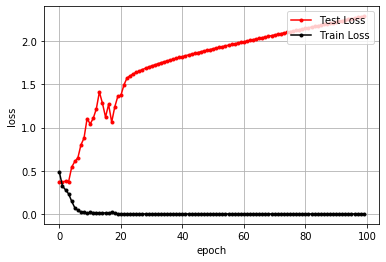

In [17]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']

plt.plot(y_val_loss, marker='.', c='red', label='Test Loss')
plt.plot(y_loss, marker='.', c='black', label='Train Loss')
plt.legend(loc='upper right')
plt.grid();plt.xlabel('epoch');plt.ylabel('loss');plt.show()

In [ ]:
쓰레기를 만들었자너 ㅠ